In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Modüllerin yüklenmesi

In [4]:
data = pd.read_csv("seker.csv")
data.head()
# Outcome 0 = Sağlıklı 
# Outcome 1 = Diabet / Seker Hastasi

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


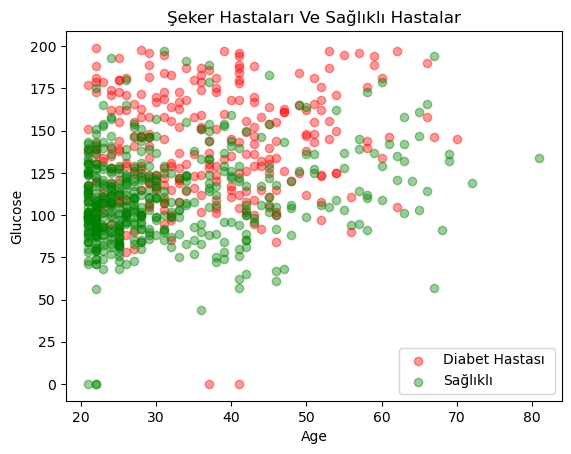

In [5]:
sekerHastalari = data[data.Outcome == 1]
saglikliHastalar = data[data.Outcome == 0]

plt.scatter(sekerHastalari.Age , sekerHastalari.Glucose , label = "Diabet Hastası " , color = "red" , alpha = 0.4 )
plt.scatter(saglikliHastalar.Age , saglikliHastalar.Glucose , label = "Sağlıklı" , color = "green" , alpha = 0.4)
plt.title("Şeker Hastaları Ve Sağlıklı Hastalar")
plt.xlabel("Age")
plt.ylabel("Glucose")
plt.legend()
plt.show()


# Scatter ile aşşağıdaki grafik oluşturuluyor.
#Şeker hastalarını ve sağlıklı hastaları önce farklı değişkenlerde tutarak tablolarını çizdik
# Alpha kırmızı veya yeşil noktanın ne kadar transparan olucağını ayarlar

In [6]:
# X ve Y eksenleri
y = data.Outcome.values
x_ham = data.drop(['Outcome'] , axis = 1) # axis 1 : x ekseni

#Normalizasyon öncesi : 

x_ham



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [8]:
# Normalizasyon sonrası :
minimum = x_ham.min(axis=0)
maksimum = x_ham.max(axis=0)
x = (x_ham-minimum)/(maksimun - minimun)
x.head()

#Normalizasyon ile sayıları 0 - 1 arasında sayılara eşitleyerek yüksek rakamların küçük rakamları ezmesini önlüyoruz.

NameError: name 'maksimun' is not defined

In [29]:
#train datamı ile test datamızı ayırıyoruz 
#train datamız sistemin sağlıklı insanlar ile hasta insanlari ayirt etmesini öğrenmesi için kullanıcak

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2 , random_state = 1)

# knn modelini oluşturuyoruz
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(x_train , y_train) #fit Eğitim aşaması
prodiction =  knn.predict(x_test)

print("K = 3 için Test Verilerimizin Doğruluk Oranı : "  , knn.score(x_test , y_test))


K = 3 için Test Verilerimizin Doğruluk Oranı :  0.8116883116883117


In [28]:
#Bu durumda k en uygun kaç olmalı ? 
#en iyi k değerini belirleyelim 

sayac = 1 
for k in range(1,10):
    knn_yeni = KNeighborsClassifier(n_neighbors = k)
    knn_yeni.fit(x_train, y_train)
    print(sayac , " Doğruluk oranı : %", knn_yeni.score(x_test , y_test) * 100)
    sayac += 1

1  Doğruluk oranı : % 69.48051948051948
2  Doğruluk oranı : % 74.02597402597402
3  Doğruluk oranı : % 78.57142857142857
4  Doğruluk oranı : % 75.97402597402598
5  Doğruluk oranı : % 79.87012987012987
6  Doğruluk oranı : % 79.22077922077922
7  Doğruluk oranı : % 81.16883116883116
8  Doğruluk oranı : % 79.22077922077922
9  Doğruluk oranı : % 78.57142857142857


In [45]:
#Normalizasyonu daha hızlı yapmak için : 
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
sc.fit_transform(x_ham)

new_predic = knn.predict(sc.transform(np.array([[6 , 148 , 72 , 35 , 0 , 33.6 , 0.627 , 30]])))
new_predic[0]

C:\Users\uGur\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\uGur\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0